Scenirio

The Objective of this assignment is to introduce students to rule mining techniques, particularly focusing on market basket analysis and provide hands on experience.
Dataset:
Use the Online retail dataset to apply the association rules.
Data Preprocessing:
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  
Association Rule Mining:
Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.
 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.
Set appropriate threshold for support, confidence and lift to extract meaning full rules.
Analysis and Interpretation:
Analyse the generated rules to identify interesting patterns and relationships between the products.
Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.
Interview Questions:
1.What is lift and why is it important in Association rules?
2.What is support and Confidence. How do you calculate them?
3.What are some limitations or challenges of Association rules mining?


solution

In [3]:
# Step 1: Load the Dataset
import pandas as pd

In [4]:
df = pd.read_excel('Online retail.xlsx')

In [5]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB
None


In [6]:
# Show first few rows
print(df.head())

  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1                                            chutney                                                                                                                                                                             
2                                     turkey,avocado                                                                                                                                                                             
3  mineral water,milk,energy bar,whole wheat rice...                                            

In [7]:
# Check for missing values
print(df.isnull().sum())

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64


In [8]:
# Step 2: Data Preprocessing
# Drop rows with missing values
df.dropna(inplace=True)

In [9]:
df.columns

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')

In [10]:
# Convert Data into Transaction Format
# We'll split the product list into separate items and transform it into a basket format.

In [11]:
# Convert transaction string into a list of items
df['Transaction'] = df[df.columns[0]].apply(lambda x: x.split(','))

In [12]:
# Convert transactions into a list of lists
transactions = df['Transaction'].tolist()

In [13]:
# Print the first few transactions
print(transactions[:5])  # To see how transactions look

[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt']]


In [14]:
# Convert to One-Hot Encoding
# We now convert this list of transactions into a one-hot encoded DataFrame.

In [15]:
from mlxtend.preprocessing import TransactionEncoder

In [16]:
# Use TransactionEncoder to one-hot encode the transaction data
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

In [17]:
# Convert to DataFrame
basket = pd.DataFrame(te_array, columns=te.columns_)

print(basket.head())  # Display the transformed data

    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False    False              False      False    False        False   
1       False    False              False      False    False        False   
2       False    False              False      False     True        False   
3       False    False              False      False    False        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False           False   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...    True           False   
3  False           False      False        False  ...   False           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour

In [18]:
# Step 3: Apply Apriori Algorithm
# Now that the data is formatted correctly, we can apply Association Rule Mining.

In [19]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [20]:
# Apply Apriori algorithm to get frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

In [21]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [22]:
# Display top rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

       antecedents     consequents  support  confidence      lift
0        (burgers)          (eggs)   0.0288    0.330275  1.837585
1           (eggs)       (burgers)   0.0288    0.160237  1.837585
2   (french fries)       (burgers)   0.0220    0.128705  1.475976
3        (burgers)  (french fries)   0.0220    0.252294  1.475976
4  (mineral water)       (burgers)   0.0244    0.102406  1.174384


In [23]:
# Adjusting Thresholds in Apriori Algorithm
# We modify the min_support, confidence, and lift values to filter stronger relationships.

In [24]:
# Apply Apriori with a lower or higher min_support as needed
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)  # Adjust support here

In [25]:
# Generate association rules with adjusted confidence and lift
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)  # Adjust confidence
rules = rules[rules['lift'] > 1.2]  # Adjust lift

In [26]:
# Display top rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

  antecedents      consequents   support  confidence      lift
0   (avocado)  (mineral water)  0.011467    0.345382  1.449559
1   (burgers)           (eggs)  0.028800    0.330275  1.837585
2      (cake)  (mineral water)  0.027467    0.338816  1.422002
3   (cereals)  (mineral water)  0.010267    0.398964  1.674442
4   (chicken)  (mineral water)  0.022800    0.380000  1.594852


In [27]:
import matplotlib.pyplot as plt

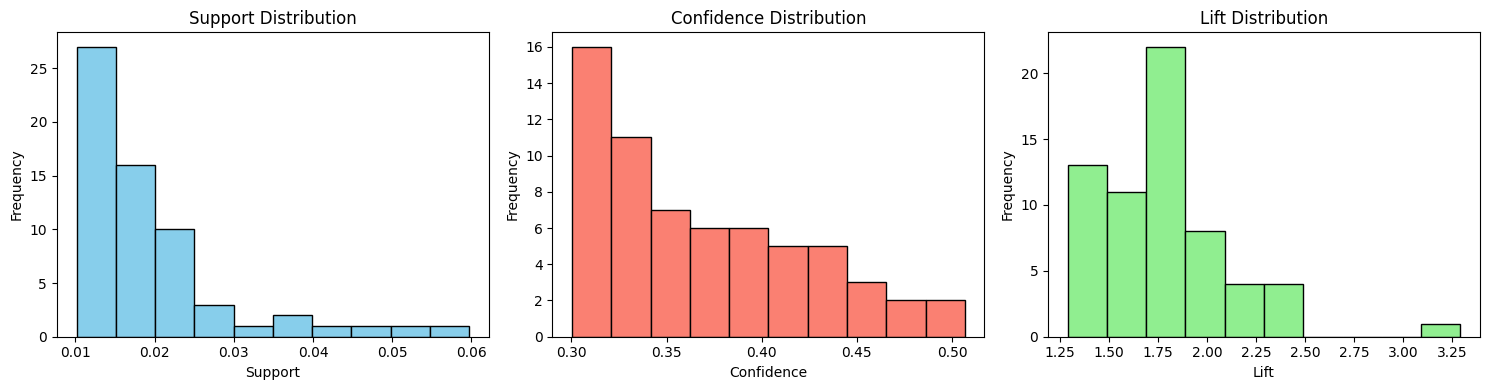

In [28]:
# Visualize the Distribution of Support, Confidence, and Lift
# Plot histograms for Support, Confidence, and Lift
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Support distribution
axes[0].hist(rules['support'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Support Distribution')
axes[0].set_xlabel('Support')
axes[0].set_ylabel('Frequency')

# Confidence distribution
axes[1].hist(rules['confidence'], bins=10, color='salmon', edgecolor='black')
axes[1].set_title('Confidence Distribution')
axes[1].set_xlabel('Confidence')
axes[1].set_ylabel('Frequency')

# Lift distribution
axes[2].hist(rules['lift'], bins=10, color='lightgreen', edgecolor='black')
axes[2].set_title('Lift Distribution')
axes[2].set_xlabel('Lift')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [29]:
import networkx as nx


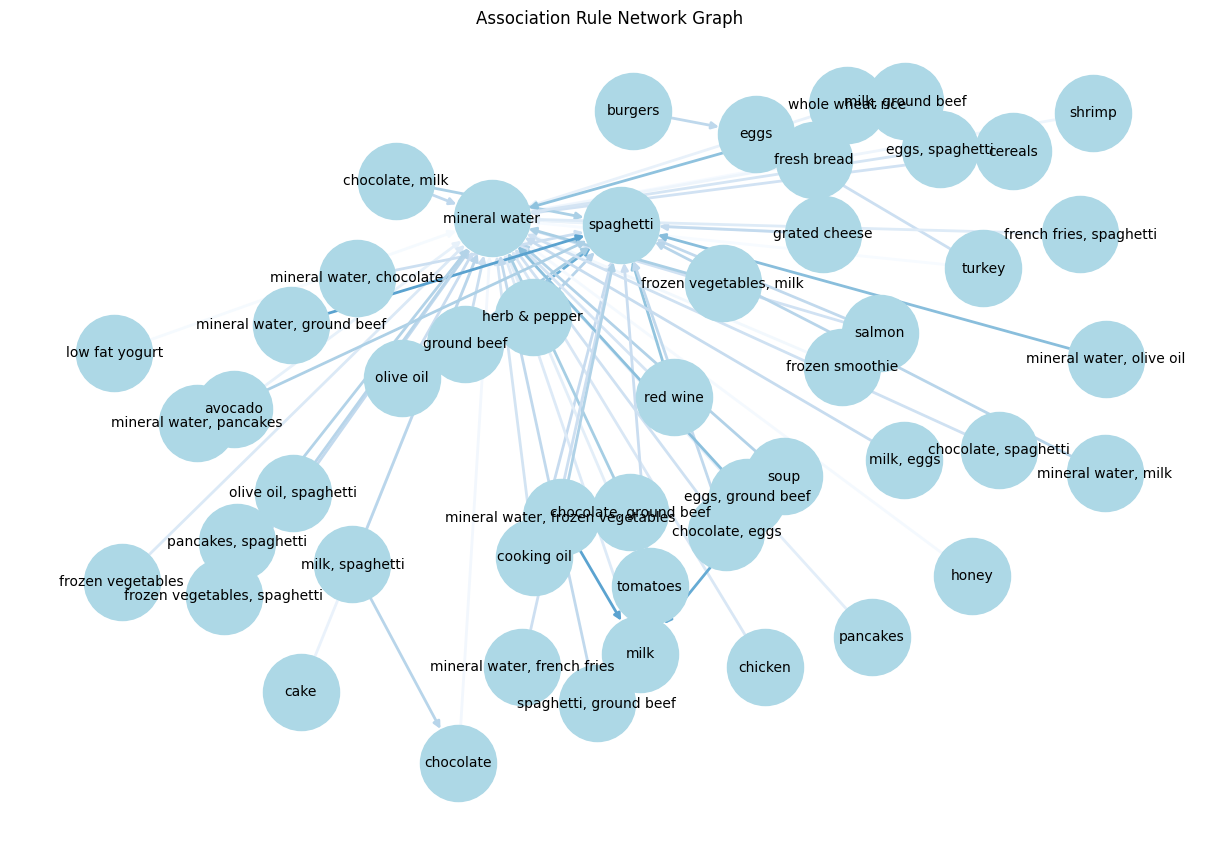

In [30]:
# Network Graph for Association Rules
# Create a Network Graph of association rules
G = nx.DiGraph()

for _, row in rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  # Layout for better spacing
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]  # Lift values as edge weights

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, edge_color=weights,
        edge_cmap=plt.cm.Blues, width=2)

plt.title("Association Rule Network Graph")
plt.show()



In [31]:
# Interpretation of Results
# Top Rules with Business Insights
# Print top rules for insights
for i, row in rules.sort_values(by='lift', ascending=False).head(5).iterrows():
    print(f"Rule {i+1}: {', '.join(row['antecedents'])} → {', '.join(row['consequents'])}")
    print(f"  - Support: {row['support']:.2f}")
    print(f"  - Confidence: {row['confidence']:.2f}")
    print(f"  - Lift: {row['lift']:.2f}\n")


Rule 15: herb & pepper → ground beef
  - Support: 0.02
  - Confidence: 0.32
  - Lift: 3.29

Rule 56: mineral water, ground beef → spaghetti
  - Support: 0.02
  - Confidence: 0.42
  - Lift: 2.39

Rule 51: mineral water, frozen vegetables → milk
  - Support: 0.01
  - Confidence: 0.31
  - Lift: 2.39

Rule 23: soup → milk
  - Support: 0.02
  - Confidence: 0.30
  - Lift: 2.32

Rule 17: ground beef → spaghetti
  - Support: 0.04
  - Confidence: 0.40
  - Lift: 2.29



# Interview Questions:
# 1.	What is lift and why is it important in Association rules?
# Lift measures how much more likely two items are to be bought together compared to them being purchased independently.
# Why It’s Important:

# A higher lift value means a strong dependency between items.
# Helps filter out weak rules and focus on meaningful relationships.

# 2.	What is support and Confidence. How do you calculate them?
# Support:
# Indicates how frequently an item or item set appears in all transactions.
# Example: If 5 out of 100 transactions contain “bread & butter,” the support is 5%.
# Confidence:
# Measures the likelihood that the consequent (Y) is bought given that the antecedent (X) is bought.
# Example: If “milk” appears in 20% of transactions and "milk & cereal" together appear in 15%, then:

# \text{Confidence} (milk \Rightarrow cereal) = \frac{15}{20} = 0.75 \text{ (75%)}
# Higher confidence means a stronger rule.

# 3.	What are some limitations or challenges of Association rules mining?
# High Computational Cost – For large datasets, Apriori can be slow as it scans the database multiple times.

# Too Many Rules – Can generate thousands of rules, making it hard to find meaningful ones.

# Low Support for Rare Items – Rare but valuable item associations may be missed.

# Redundant Rules – Some rules might be obvious or repetitive (e.g., "Bread → Butter" and "Butter → Bread").

# Lack of Temporal Context – Doesn’t consider time-based trends (e.g., seasonal purchase patterns).